**Carga del DATASET**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargar el dataset MNIST usando TensorFlow/Keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# ----------------------------
# OPCIONAL: Combinar conjuntos para análisis y limpieza global
# Descomenta las siguientes líneas si deseas trabajar con el dataset completo combinado
# images = np.concatenate((train_images, test_images), axis=0)
# labels = np.concatenate((train_labels, test_labels), axis=0)
# ----------------------------

# Mostrar información básica
print("Imágenes de entrenamiento:", train_images.shape[0])
print("Imágenes de test:", test_images.shape[0])
print("Dimensiones de cada imagen:", train_images.shape[1:])
print("Etiquetas únicas en entrenamiento:", np.unique(train_labels))


# ----------------------------
# OPCIONAL: Dividir el dataset combinado en Entrenamiento, Validación y Test
# Si has combinado los datos y deseas re-dividirlos, descomenta las siguientes líneas.
# Asegúrate de que las variables 'images' y 'labels' existan (es decir, has descomentado la combinación anteriormente).

# from sklearn.model_selection import train_test_split
# # Dividir en entrenamiento (70%) y un conjunto temporal (30%)
# X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
# # Dividir el conjunto temporal en validación (15%) y test (15%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
# print("Entrenamiento:", X_train.shape, y_train.shape)
# print("Validación:", X_val.shape, y_val.shape)
# print("Test:", X_test.shape, y_test.shape)
# ----------------------------


Imágenes de entrenamiento: 60000
Imágenes de test: 10000
Dimensiones de cada imagen: (28, 28)
Etiquetas únicas en entrenamiento: [0 1 2 3 4 5 6 7 8 9]


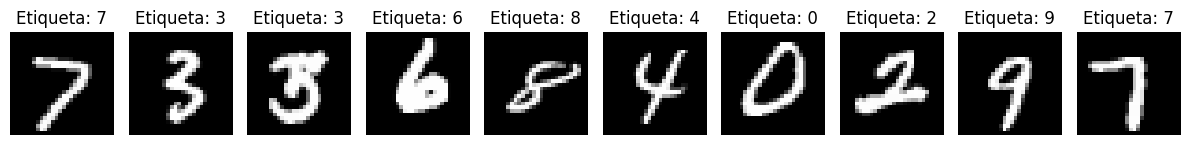

In [30]:
# Visualización de algunas muestras del conjunto de entrenamiento
num_samples = 10
indices = np.random.choice(train_images.shape[0], num_samples, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Distribución de imágenes por dígito:
Dígito 0: 5923 imágenes
Dígito 1: 6742 imágenes
Dígito 2: 5958 imágenes
Dígito 3: 6131 imágenes
Dígito 4: 5842 imágenes
Dígito 5: 5421 imágenes
Dígito 6: 5918 imágenes
Dígito 7: 6265 imágenes
Dígito 8: 5851 imágenes
Dígito 9: 5949 imágenes


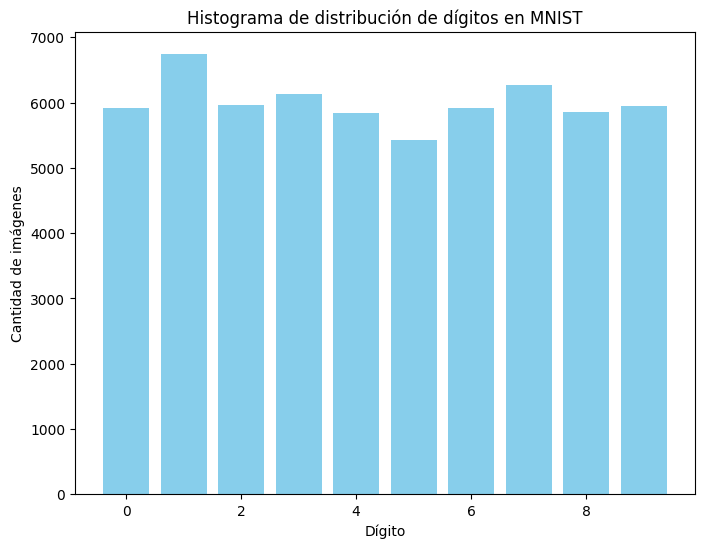

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suponiendo que ya tienes cargados los datos en train_images y train_labels

# ----------------------------
# 1. Distribución de Clases
# Calcular la cantidad de imágenes por dígito
unique, counts = np.unique(train_labels, return_counts=True)
print("Distribución de imágenes por dígito:")
for digit, count in zip(unique, counts):
    print(f"Dígito {digit}: {count} imágenes")

# Histograma de la distribución
plt.figure(figsize=(8, 6))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Dígito')
plt.ylabel('Cantidad de imágenes')
plt.title('Histograma de distribución de dígitos en MNIST')
plt.show()


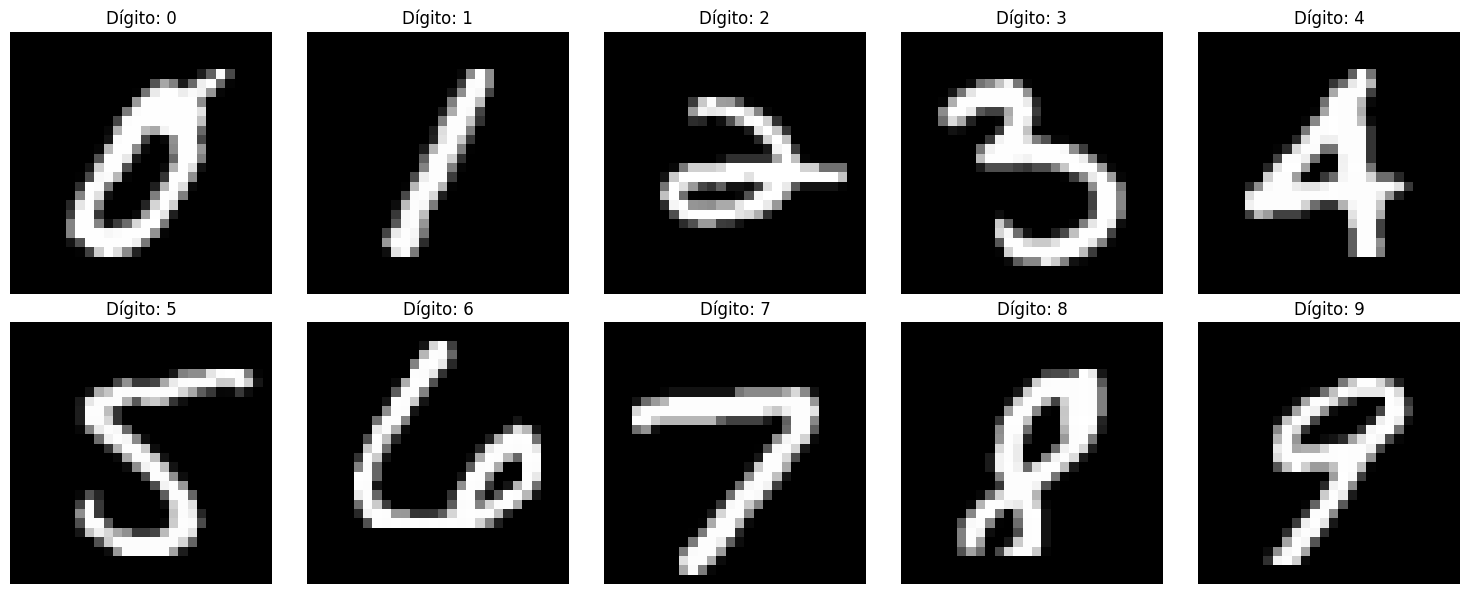

In [32]:
# ----------------------------
# 2. Visualización de Ejemplos por Clase
# Mostrar una imagen representativa para cada dígito
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for digit in range(10):
    # Obtener índices de imágenes que corresponden a cada dígito
    indices = np.where(train_labels == digit)[0]
    # Seleccionar un ejemplo al azar
    sample_index = np.random.choice(indices)
    ax = axes[digit // 5, digit % 5]
    ax.imshow(train_images[sample_index], cmap='gray')
    ax.set_title(f"Dígito: {digit}")
    ax.axis('off')
plt.tight_layout()
plt.show()


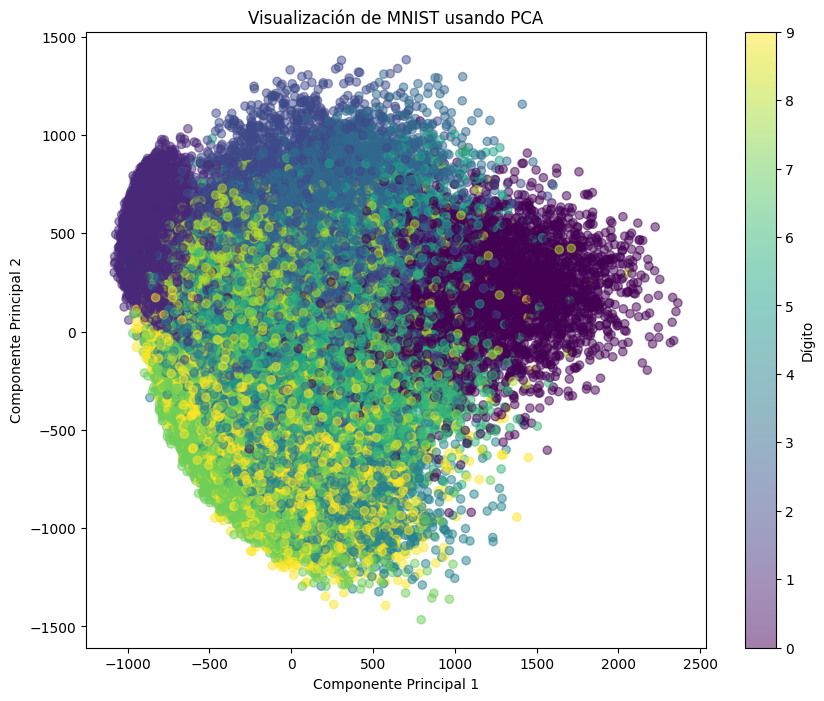

In [33]:
# ----------------------------
# 3. Visualización Global con PCA (Opcional)
# Aplanar las imágenes para aplicar PCA
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Reducir a 2 componentes principales
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_images_flat)

# Scatter plot de la proyección
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de MNIST usando PCA')
plt.colorbar(scatter, label='Dígito')
plt.show()


In [34]:
# Normalización: Convertir los valores de píxeles de [0, 255] a [0, 1]
train_images_norm = train_images.astype('float32') / 255.0
test_images_norm = test_images.astype('float32') / 255.0

print("Normalización completada.")
print("Rango de valores (train):", train_images_norm.min(), "a", train_images_norm.max())

Normalización completada.
Rango de valores (train): 0.0 a 1.0


In [35]:
# Conversión de formato: Agregar la dimensión del canal para cumplir con el formato requerido por CNNs en Keras (n_samples, 28, 28, 1)

train_images_norm = np.expand_dims(train_images_norm, -1)
test_images_norm = np.expand_dims(test_images_norm, -1)

print("Nuevo shape de train_images:", train_images_norm.shape)
print("Nuevo shape de test_images:", test_images_norm.shape)


Nuevo shape de train_images: (60000, 28, 28, 1)
Nuevo shape de test_images: (10000, 28, 28, 1)


**DATA AUGMENTATION**


In [36]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Configuración del generador de Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=10,         # Rotación de hasta 10 grados
#     width_shift_range=0.1,       # Desplazamiento horizontal del 10%
#     height_shift_range=0.1,      # Desplazamiento vertical del 10%
#     zoom_range=0.1,              # Zoom de hasta el 10%
#     brightness_range=[0.8, 1.2]  # Variación del brillo entre 0.8 y 1.2
# )

# print("Data Augmentation configurado.")


In [37]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Suponiendo que 'train_images_norm' ya tiene la forma (n_samples, 28, 28, 1)
# # Seleccionar la primera imagen de muestra
# sample_image = train_images_norm[0]  # Forma esperada: (28, 28, 1)

# # Asegurarse de que la imagen tenga la dimensión de batch (1, 28, 28, 1)
# if sample_image.ndim == 3:
#     sample_image_reshaped = np.expand_dims(sample_image, axis=0)  # Resultado: (1, 28, 28, 1)
# else:
#     sample_image_reshaped = sample_image

# # Inicializar el generador para la imagen de muestra
# gen = datagen.flow(sample_image_reshaped, batch_size=1)

# # Generar y almacenar 5 imágenes aumentadas, verificando su forma
# augmented_images = []
# for _ in range(5):
#     augmented_img = next(gen)[0]  # Se espera forma: (28, 28, 1)
#     print("Forma generada:", augmented_img.shape)  # Diagnóstico
#     # Usar np.squeeze para eliminar dimensiones de tamaño 1
#     img_squeezed = np.squeeze(augmented_img)  # Se espera (28, 28) si la forma era (28,28,1)
#     augmented_images.append(img_squeezed)

# # Visualizar las imágenes aumentadas
# plt.figure(figsize=(12, 4))
# for i, img in enumerate(augmented_images):
#     plt.subplot(1, 5, i+1)
#     plt.imshow(img, cmap='gray')
#     plt.title("Aumento")
#     plt.axis('off')
# plt.tight_layout()
# plt.show()


**FIN DATA AUGMENTATION**


**ENTRENAMIENTO, VALIDACION, TEST**

In [38]:
from sklearn.model_selection import train_test_split

# OPCIONAL: Si previamente combinaste el conjunto de entrenamiento y test, descomenta la siguiente línea:
# data_images, data_labels = images, labels

# Si prefieres usar únicamente el conjunto de entrenamiento original, utiliza esta línea:
data_images, data_labels = train_images_norm, train_labels

# Paso 1: Dividir en entrenamiento (70%) y un conjunto temporal (30%)
# Se utiliza stratify para mantener la distribución de clases en ambos conjuntos
X_train, X_temp, y_train, y_temp = train_test_split(
    data_images, data_labels, test_size=0.3, random_state=42, stratify=data_labels
)

# Paso 2: Dividir el conjunto temporal en validación (15%) y test (15%)
# Como X_temp representa el 30%, dividirlo a la mitad nos da 15% para validación y 15% para test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Mostrar información de los conjuntos resultantes
print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de validación:", X_val.shape, y_val.shape)
print("Conjunto de test:", X_test.shape, y_test.shape)


Conjunto de entrenamiento: (42000, 28, 28, 1) (42000,)
Conjunto de validación: (9000, 28, 28, 1) (9000,)
Conjunto de test: (9000, 28, 28, 1) (9000,)


**DEFINICION DEL MODELO**

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definición del modelo CNN
model = Sequential([
    # Primera capa convolucional: 32 filtros de 3x3 y función de activación ReLU
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Capa de pooling para reducir la dimensionalidad espacial
    MaxPooling2D(pool_size=(2, 2)),
    # Segunda capa convolucional: 64 filtros de 3x3
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Aplanar las salidas para conectarlas a las capas densas
    Flatten(),
    # Capa densa con 128 neuronas y activación ReLU
    Dense(128, activation='relu'),
    # Dropout para reducir el sobreajuste
    Dropout(0.5),
    # Capa de salida: 10 neuronas (una por dígito) con activación softmax para clasificación
    Dense(10, activation='softmax')
])


C:\Users\Alumno_AI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**COMPILACION DEL MODELO**

In [40]:
# Compilar el modelo con el optimizador Adam y la función de pérdida adecuada para clasificación multiclase
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Mostrar el resumen del modelo para verificar la arquitectura
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Incorporar EarlyStopper**

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping para detener el entrenamiento si la 'val_loss' no mejora después de 3 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


**ENTRENAMIENTO DE MODELO**

In [42]:
# Entrenar el modelo usando el callback EarlyStopping
history = model.fit(
    X_train, y_train, 
    epochs=20,              # Sugerencia: entre 10 y 20 épocas, puedes ajustar según veas evolución en 'loss' y 'accuracy'
    batch_size=64,          # Sugerencia: puedes probar con 32 o 64
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]  # Incluir el callback para early stopping
)



Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8177 - loss: 0.5707 - val_accuracy: 0.9782 - val_loss: 0.0733
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9709 - loss: 0.0980 - val_accuracy: 0.9818 - val_loss: 0.0543
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9794 - loss: 0.0693 - val_accuracy: 0.9873 - val_loss: 0.0409
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9838 - loss: 0.0543 - val_accuracy: 0.9868 - val_loss: 0.0390
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9866 - loss: 0.0454 - val_accuracy: 0.9889 - val_loss: 0.0385
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9880 - loss: 0.0390 - val_accuracy: 0.9891 - val_loss: 0.0353
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9903 - val_loss: 0.0323
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9919 - loss: 0.0269 - val_accuracy: 0.

**Validacion Cruzada**


In [43]:
from sklearn.model_selection import KFold
import numpy as np

# Configurar K-Fold con 5 particiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# Se asume que X_train y y_train están definidos y tienen la forma correcta
for train_index, val_index in kf.split(X_train):
    X_tr, X_val_cv = X_train[train_index], X_train[val_index]
    y_tr, y_val_cv = y_train[train_index], y_train[val_index]
    
    # Redefinir y compilar el modelo base para cada partición (esto asegura pesos iniciales iguales en cada iteración)
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Entrenar silenciosamente (verbose=0) para cada partición
    model.fit(
        X_tr, y_tr,
        epochs=20,
        batch_size=64,
        validation_data=(X_val_cv, y_val_cv),
        callbacks=[early_stopping],
        verbose=0
    )
    loss, acc = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    cv_scores.append(acc)

print("Precisión promedio en validación cruzada (modelo base):", np.mean(cv_scores))


Precisión promedio en validación cruzada (modelo base): 0.9902142882347107


**Visualizacion de la Evolucion del entrenamiento**

**Precision**


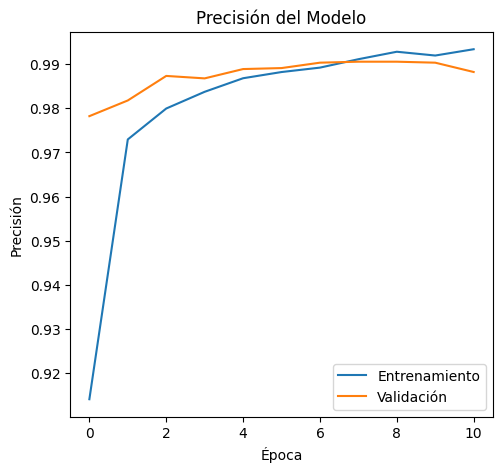

In [44]:
import matplotlib.pyplot as plt

# Graficar la precisión y pérdida tanto en entrenamiento como en validación
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()




**Perdida**

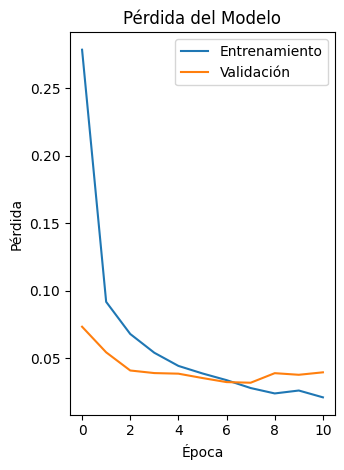

In [45]:
# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

**Evaluacion final**

In [46]:
# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Precisión en el conjunto de test:", test_acc)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0336
Precisión en el conjunto de test: 0.9886666536331177


In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones sobre el conjunto de test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)




282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Matriz de confusion**

Matriz de Confusión:


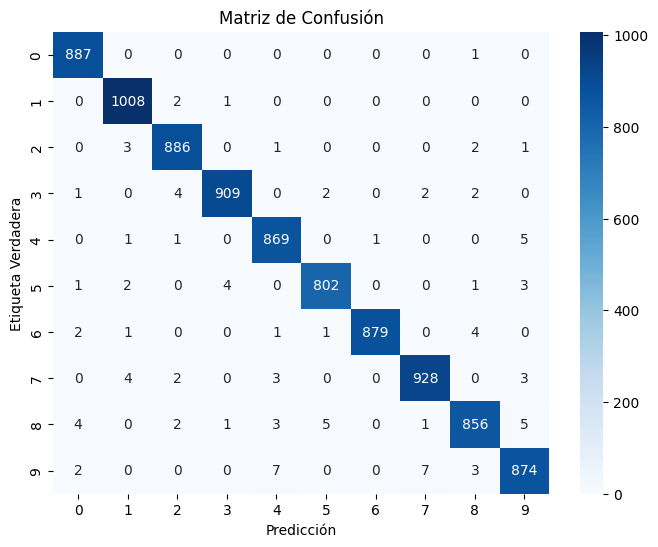

In [48]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()



**Reporte de clasificacion**

In [49]:
# Mostrar el reporte de clasificación con precisión, recall y F1-score para cada clase
report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(report)




Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       888
           1       0.99      1.00      0.99      1011
           2       0.99      0.99      0.99       893
           3       0.99      0.99      0.99       920
           4       0.98      0.99      0.99       877
           5       0.99      0.99      0.99       813
           6       1.00      0.99      0.99       888
           7       0.99      0.99      0.99       940
           8       0.99      0.98      0.98       877
           9       0.98      0.98      0.98       893

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



**Analisis de errores**

Imagenes mal clasificadas


In [50]:
# Encontrar índices de imágenes mal clasificadas
misclassified_indices = np.where(y_pred != y_test)[0]
print("Número de imágenes mal clasificadas:", len(misclassified_indices))

Número de imágenes mal clasificadas: 102


**Visualizacion imagenes mal clasificadas**

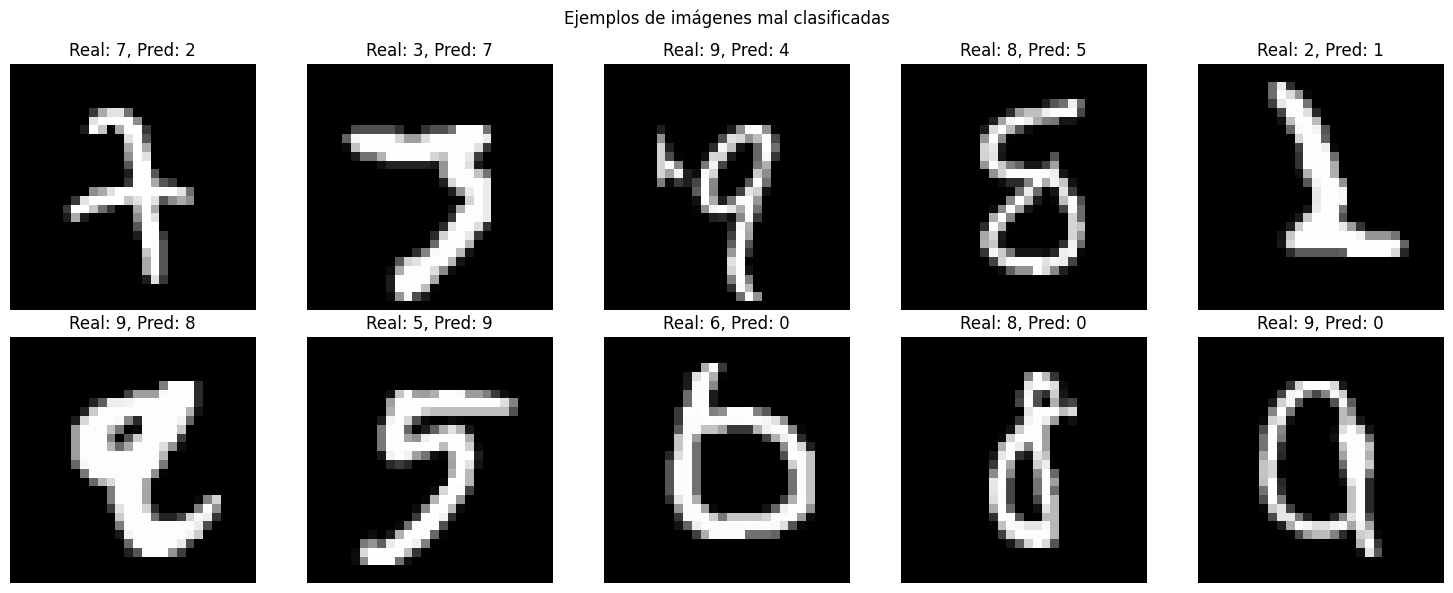

In [51]:
# Visualizar 10 ejemplos de imágenes mal clasificadas
num_examples = 10
plt.figure(figsize=(15, 6))
for i, index in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(2, 5, i+1)
    # Redimensionar la imagen (si X_test tiene forma (n,28,28,1), se extrae el canal)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {y_test[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes mal clasificadas")
plt.tight_layout()
plt.show()

**Prueba de prediccion**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicción del dígito: 2


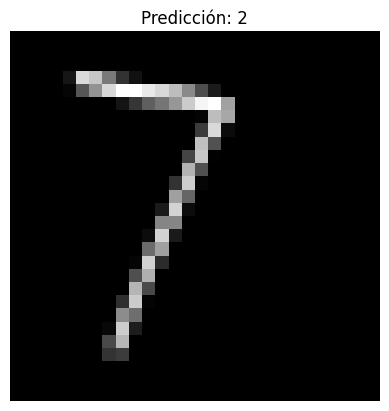

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar y preprocesar la imagen
def load_and_preprocess_image(image_path):
    # Cargar la imagen y convertirla a escala de grises
    img = Image.open(image_path).convert('L')
    # Redimensionar la imagen a 28x28 píxeles
    img = img.resize((28, 28))
    # Convertir la imagen a un array NumPy
    img_array = np.array(img)
    # Si la imagen tiene fondo blanco (valor medio alto), invertir colores para que el dígito sea claro
    if np.mean(img_array) > 127:
        img_array = 255 - img_array
    # Normalizar los valores al rango [0,1]
    img_array = img_array.astype('float32') / 255.0
    # Agregar la dimensión del canal (28, 28) -> (28, 28, 1)
    img_array = np.expand_dims(img_array, axis=-1)
    # Agregar la dimensión de batch (28, 28, 1) -> (1, 28, 28, 1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Ruta de la imagen que vas a subir (ejemplo: "test_digit.png")
image_path = 'test_digit.png'
processed_image = load_and_preprocess_image(image_path)

# Obtener la predicción del modelo
prediction_probs = model.predict(processed_image)
predicted_class = np.argmax(prediction_probs)
print("Predicción del dígito:", predicted_class)

# Visualizar la imagen procesada junto con la predicción
plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicción: {predicted_class}")
plt.axis('off')
plt.show()
